Μέρος 2ο.



Βακαλοπούλου Μυρσίνη, 03114308

Χατζηχαραλάμπους Γεώργιος, 03114709

Ομάδα Α29

In [0]:
#Ορισμός της 2ης συνάρτησης

from math import *
import math

def f2(x, k = 10):
    D = len(x) #D is the dimension
    S = 0
    for i in range(D):
        si = cos(k*x[i])*exp(-1*(x[i]**2)/2)
        S += si
    return (1-1/D*S)

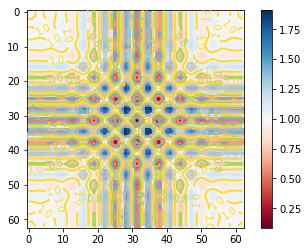

In [0]:
# 2D εκτύπωση συνάρτηση για οπτική κατανόηση της

import numpy as np
from numpy import exp,arange,linspace
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import matplotlib.pyplot as plt
%matplotlib inline

#plot 2D
D = 2
x=[]

for i in range(2):
    x.append(arange(-pi, pi, 0.1))

X,Y = meshgrid(x[0], x[1]) # grid of point

Z=[]

for i in range(len(x[0])):
    new_list = []
    Z.append(new_list)
    for j in range(len(x[1])):
        z=[]
        z.append(x[0][i])
        z.append(x[1][j])
        Z[i].append(f2(z))

Z = np.array(Z).reshape(-1, len(x[0]))

im = imshow(Z, cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z, arange(-1,1.5,0.2), linewidths=2, cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
show()

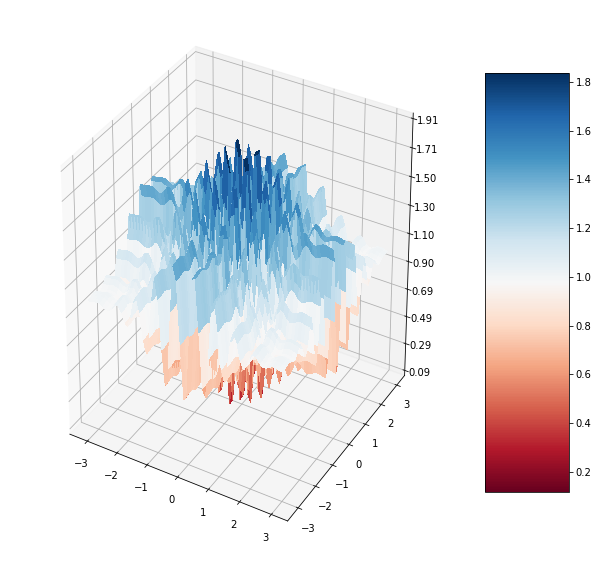

In [0]:
#3D εκτύπωση συνάρτηση

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, aspect=5)

plt.show()

In [0]:
#Ορισμός μέσω της βιβλιοθήκης deap των fitness και individual

import random
from deap import base, creator, tools, algorithms

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

/home/myrsini/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/myrsini/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [0]:
#Ορισμός των απαραίτητων συναρτήσεων που θα χρησιμοποιηθούν παρακάτω στα toolboxes

numVariables=2 #πλήθος μεταβλητών, ουσιαστικά είναι η διάσταση.
MIN_BOUND = np.array([-pi]*numVariables) #Όρια πεδίου ορισμού
MAX_BOUND = np.array([pi]*numVariables)

def evalSinFunc(indiv):
    result = f2(indiv)
    return (result,)


def sigmoid(x):
    return 1 / (1 + math.exp(-x))

#Ορισμός των ορίων εκτός του οποίων η λύση θεωρείται εκτός πεδίου ορισμού.
#Τα όρια εξαρτώνται από τη διάσταση D.
#Χρησιμοποιείται μόνο για τις μεγαλύτερες διαστάσεις
def define_bounds(D):    
    numVariables=D
    MIN_BOUND = np.array([-pi]*numVariables)
    MAX_BOUND = np.array([pi]*numVariables)
    #η τιμή αυτή αλλάζει στο μέρος 2(βελτιστοποίηση σε μεγάλες διαστάσεις) 
    #τώρα αναγράφεται η τελική τιμή δηλαδή DELTA/4
    DELTA = 0.0025*sigmoid(D/50 -2) 
    return MIN_BOUND, MAX_BOUND, DELTA


def feasible(indiv):
    if any(indiv < MIN_BOUND) or any(indiv > MAX_BOUND):
        return False
    return True

def distance(indiv):
    dist = 0.0
    for i in range (len(indiv)) :
        penalty = 0
        if (indiv[i] < MIN_BOUND[i]): penalty = -pi - indiv[i]
        if (indiv[i] > MAX_BOUND[i]): penalty = indiv[i] - pi
        dist = dist + penalty
    return 0.1*pow(dist, 1/4)
#αρχικα γινοταν return 0.5+διστ. αυτο το return αφορα βελτιστοποιηση του δευτερου μερους για μεγαλες διαστασεις

In [0]:
#Ορίζουμε όλα τα δυνατά toolboxes για high/low πιθανότητα mate/mutation και για 2 tournsize.

toolbox_list=[]

#Αρχικοποίηση toolbox, ανάλογα με τη διάσταση
def toolbox_init(numVariables):#numVariables=D
    toolbox = base.Toolbox()    
    # Attribute generator 
    toolbox.register("attr_float", random.uniform, -pi, pi)
    # Structure initializers
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, numVariables) #2d func - 2 genes
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evalSinFunc)
    toolbox.decorate("evaluate", tools.DeltaPenality (feasible, 0, distance)) #(numVariables**3)
    return toolbox
    
    

for i in range(32): #common fields in toolboxes
    toolbox_var=toolbox_init(numVariables)    
    toolbox_list.append(toolbox_var)


operators = []

##### cxUniform, mutShuffleIndexes
##### tournament:3
toolbox_list[0].register("mate", tools.cxUniform, indpb=0.4) #low
toolbox_list[0].register("mutate", tools.mutShuffleIndexes, indpb=0.10) #low
toolbox_list[0].register("select", tools.selTournament, tournsize=3)
operators.append("cxUniform low, mutShuffleIndexes low,select low")

toolbox_list[1].register("mate", tools.cxUniform, indpb=0.8) #high
toolbox_list[1].register("mutate", tools.mutShuffleIndexes, indpb=0.10) #low
toolbox_list[1].register("select", tools.selTournament, tournsize=3)
operators.append("cxUniform high, mutShuffleIndexes low,select low")

toolbox_list[2].register("mate", tools.cxUniform, indpb=0.4) #low
toolbox_list[2].register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox_list[2].register("select", tools.selTournament, tournsize=3)
operators.append("cxUniform low, mutShuffleIndexes high,select low")

toolbox_list[3].register("mate", tools.cxUniform, indpb=0.8) #high
toolbox_list[3].register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox_list[3].register("select", tools.selTournament, tournsize=3)
operators.append("cxUniform high, mutShuffleIndexes high,select low")

##### tournament:10
toolbox_list[4].register("mate", tools.cxUniform, indpb=0.4) #low
toolbox_list[4].register("mutate", tools.mutShuffleIndexes, indpb=0.10) #low
toolbox_list[4].register("select", tools.selTournament, tournsize=10)
operators.append("cxUniform low, mutShuffleIndexes low,select high")

toolbox_list[5].register("mate", tools.cxUniform, indpb=0.8) #high
toolbox_list[5].register("mutate", tools.mutShuffleIndexes, indpb=0.10) #low
toolbox_list[5].register("select", tools.selTournament, tournsize=10)
operators.append("cxUniform high, mutShuffleIndexes low,select high")

toolbox_list[6].register("mate", tools.cxUniform, indpb=0.4) #low
toolbox_list[6].register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox_list[6].register("select", tools.selTournament, tournsize=10)
operators.append("cxUniform low, mutShuffleIndexes high,select high")

toolbox_list[7].register("mate", tools.cxUniform, indpb=0.8) #high
toolbox_list[7].register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox_list[7].register("select", tools.selTournament, tournsize=10)
operators.append("cxUniform high, mutShuffleIndexes high,select high")


##### cxBlend, mutShuffleIndexes
##### tournament:3
toolbox_list[8].register("mate", tools.cxBlend, alpha=0.3) #low
toolbox_list[8].register("mutate", tools.mutShuffleIndexes, indpb=0.10) #low
toolbox_list[8].register("select", tools.selTournament, tournsize=3)
operators.append("cxBlend low, mutShuffleIndexes low,select low")

toolbox_list[9].register("mate", tools.cxBlend, alpha=0.8) #high
toolbox_list[9].register("mutate", tools.mutShuffleIndexes, indpb=0.10) #low
toolbox_list[9].register("select", tools.selTournament, tournsize=3)
operators.append("cxBlend high, mutShuffleIndexes low,select low")

toolbox_list[10].register("mate", tools.cxBlend, alpha=0.3) #low
toolbox_list[10].register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox_list[10].register("select", tools.selTournament, tournsize=3)
operators.append("cxBlend low, mutShuffleIndexes high,select low")

toolbox_list[11].register("mate", tools.cxBlend, alpha=0.8) #high
toolbox_list[11].register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox_list[11].register("select", tools.selTournament, tournsize=3)
operators.append("cxBlend high, mutShuffleIndexes high,select low")

##### tournament:10
toolbox_list[12].register("mate", tools.cxBlend, alpha=0.3) #low
toolbox_list[12].register("mutate", tools.mutShuffleIndexes, indpb=0.10) #low
toolbox_list[12].register("select", tools.selTournament, tournsize=10)
operators.append("cxBlend low, mutShuffleIndexes low,select high")

toolbox_list[13].register("mate", tools.cxBlend, alpha=0.8) #high
toolbox_list[13].register("mutate", tools.mutShuffleIndexes, indpb=0.10) #low
toolbox_list[13].register("select", tools.selTournament, tournsize=10)
operators.append("cxBlend high, mutShuffleIndexes low,select high")

toolbox_list[14].register("mate", tools.cxBlend, alpha=0.3) #low
toolbox_list[14].register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox_list[14].register("select", tools.selTournament, tournsize=10)
operators.append("cxBlend low, mutShuffleIndexes high,select high")

toolbox_list[15].register("mate", tools.cxBlend, alpha=0.8) #high
toolbox_list[15].register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox_list[15].register("select", tools.selTournament, tournsize=10)
operators.append("cxBlend high, mutShuffleIndexes high,select high")



##### cxUniform, mutGaussian
##### tournament:3
toolbox_list[16].register("mate", tools.cxUniform, indpb=0.4) #low
toolbox_list[16].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.10) #low
toolbox_list[16].register("select", tools.selTournament, tournsize=3)
operators.append("cxUniform low, mutGaussian low,select low")

toolbox_list[17].register("mate", tools.cxUniform, indpb=0.8) #high
toolbox_list[17].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.10) #low
toolbox_list[17].register("select", tools.selTournament, tournsize=3)
operators.append("cxUniform high, mutGaussian low,select low")

toolbox_list[18].register("mate", tools.cxUniform, indpb=0.4) #low
toolbox_list[18].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.80) #high
toolbox_list[18].register("select", tools.selTournament, tournsize=3)
operators.append("cxUniform low, mutGaussian high,select low")

toolbox_list[19].register("mate", tools.cxUniform, indpb=0.8) #high
toolbox_list[19].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.80) #high
toolbox_list[19].register("select", tools.selTournament, tournsize=3)
operators.append("cxUniform high, mutGaussian high,select low")

##### tournament:10
toolbox_list[20].register("mate", tools.cxUniform, indpb=0.4) #low
toolbox_list[20].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.10) #low
toolbox_list[20].register("select", tools.selTournament, tournsize=10)
operators.append("cxUniform low, mutGaussian low,select high")

toolbox_list[21].register("mate", tools.cxUniform, indpb=0.8) #high
toolbox_list[21].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.10) #low
toolbox_list[21].register("select", tools.selTournament, tournsize=10)
operators.append("cxUniform high, mutGaussian low,select high")

toolbox_list[22].register("mate", tools.cxUniform, indpb=0.4) #low
toolbox_list[22].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.80) #high
toolbox_list[22].register("select", tools.selTournament, tournsize=10)
operators.append("cxUniform low, mutGaussian high,select high")

toolbox_list[23].register("mate", tools.cxUniform, indpb=0.8) #high
toolbox_list[23].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.80) #high
toolbox_list[23].register("select", tools.selTournament, tournsize=10)
operators.append("cxUniform high, mutGaussian high,select high")


##### cxBlend, mutGaussian
##### tournament:3
toolbox_list[24].register("mate", tools.cxBlend, alpha=0.3) #low
toolbox_list[24].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.10) #low
toolbox_list[24].register("select", tools.selTournament, tournsize=3)
operators.append("cxBlend low, mutGaussian low,select low")

toolbox_list[25].register("mate", tools.cxBlend, alpha=0.8) #high
toolbox_list[25].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.10) #low
toolbox_list[25].register("select", tools.selTournament, tournsize=3)
operators.append("cxBlend high, mutGaussian low,select low")

toolbox_list[26].register("mate", tools.cxBlend, alpha=0.3) #low
toolbox_list[26].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.80) #high
toolbox_list[26].register("select", tools.selTournament, tournsize=3)
operators.append("cxBlend low, mutGaussian high,select low")

toolbox_list[27].register("mate", tools.cxBlend, alpha=0.8) #high
toolbox_list[27].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.80) #high
toolbox_list[27].register("select", tools.selTournament, tournsize=3)
operators.append("cxBlend high, mutGaussian high,select low")

##### tournament:10
toolbox_list[28].register("mate", tools.cxBlend, alpha=0.3) #low
toolbox_list[28].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.10) #low
toolbox_list[28].register("select", tools.selTournament, tournsize=10)
operators.append("cxBlend low, mutGaussian low,select high")

toolbox_list[29].register("mate", tools.cxBlend, alpha=0.8) #high
toolbox_list[29].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.10) #low
toolbox_list[29].register("select", tools.selTournament, tournsize=10)
operators.append("cxBlend high, mutGaussian low,select high")

toolbox_list[30].register("mate", tools.cxBlend, alpha=0.3) #low
toolbox_list[30].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.80) #high
toolbox_list[30].register("select", tools.selTournament, tournsize=10)
operators.append("cxBlend low, mutGaussian high,select high")

toolbox_list[31].register("mate", tools.cxBlend, alpha=0.8) #high
toolbox_list[31].register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.80) #high
toolbox_list[31].register("select", tools.selTournament, tournsize=10)
operators.append("cxBlend high, mutGaussian high,select high")

In [0]:
#Ορισμός διαφόρων βοηθητικών συναρτήσεων, όπου για τον κάθε αλγόριθμο εκτυπώνουν
#τις τιμές των υπερπαραμέτρων που μας ενδιαφέρουν και την απόδοση του αλγορίθμου.
#Βάζουμε κάποιες default τιμές για πληθυσμό, πιθ. μετάλλαξη, πιθ. διασταύρωσης, 
#πλήθους γενεών και μ,λ όπου χρειάζεται.

import numpy
%matplotlib inline
import matplotlib.pyplot as plt

   
def eaSimple_with_stats(N=100, CXPB=0.5, MUTPB=0.2, NGEN=100):    
    pop = toolbox.population(n=N)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    strategy="eaSimple "+str(N)   
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=False)
    
    return pop, logbook, hof,strategy



def eaMuPlusLambda_with_stats(N=100, MU=40, LAMBDA=60, CXPB=0.5, MUTPB=0.2, NGEN=100):
    pop = toolbox.population(n=N)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    strategy="eaMuPlusLambda "+str(N)+" "+str(MU)+" "+str(LAMBDA)
    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=False)
    
    return pop, logbook, hof,strategy


def eaMuCommaLambda_with_stats(N=100, MU=40, LAMBDA=60, CXPB=0.5, MUTPB=0.2, NGEN=100):
    pop = toolbox.population(n=N)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    strategy="eaMuCommaLambda "+str(N)+" "+str(MU)+" "+str(LAMBDA)

    pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=False)

    return pop, logbook, hof,strategy


In [0]:
#Επιπλεόν βοηθητικές συναρτήσεις για εμφάνιση αποτελεσμάτων. Καλούν τις παραπάνω συναρτήσεις.

import time

GOAL = 0 #Σημείο ισορροπίας αυτής της συνάρτησης
DELTA = 0.000003

#Εξετάζει αν η λύση είναι αρκετά κοντά στο στόχο. 
def is_valid(min_val):
    return ((min_val > GOAL - DELTA) and (min_val < GOAL + DELTA))

#Βοηθητική συνάρτηση για μετρικές.
def metrics_calc_in_round(nevals, min_, successes, avg_min_arr, avg_evals_arr, 
                          suc_avg_gen_arr, suc_avg_min_arr, suc_avg_evals_arr):
    round_min = min(min_)
    avg_min_arr.append(round_min) #best for this round
    avg_evals_arr.append(sum(nevals)) #evals for this round

    if (is_valid(round_min)):
        successes = successes + 1

    for j in range(len(min_)):
        if (is_valid(min_[j])):
            suc_avg_gen_arr.append(j)
            suc_avg_min_arr.append(min_[j])
            suc_avg_evals_arr.append(sum(avg_evals_arr[:j]))
            break
            
    return avg_min_arr, avg_evals_arr, successes, suc_avg_gen_arr, suc_avg_min_arr, suc_avg_evals_arr


#algorithm_many_rounds: τρέχει για όσους γύρους επιβάλλουμε (max_rounds) έναν συγκεκριμένο 
#από τους 3 αλγορίθμους που εξετάζουμε (algorithm = 0 <-> (Simple), algorithm =1 <-> (m+l), 
#algorithm =2 <->(m,l)). 
#Δέχεται όλες τις παρακάτω υπερπαραμέτρους και δίνει ως έξοδο τις ζητούμενες μετρικές.
def algorithm_many_rounds(algorithm=0, max_rounds=10, POP=100, NGEN=100,CXPB=0.8, MUTPB=0.2, MU=40, LAMBDA=60): #algorthma: 0 (Simple), 1 (m+l), 2 (m,l)
    avg_min_arr = []
    avg_evals_arr = []
    avg_time_arr = []
    suc_avg_gen_arr = []
    suc_avg_min_arr = []
    suc_avg_evals_arr = []
    successes = 0
    
    if algorithm == 0: #eaSimple
        for i in range(max_rounds):
            start_time = time.time()
            pop, log, hof,strategy = eaSimple_with_stats(N=POP, NGEN=NGEN,CXPB=CXPB,MUTPB=MUTPB)    
            avg_time_arr.append(time.time() - start_time)
            gen, nevals, avg, min_, max_ = log.select("gen", "nevals", "avg", "min", "max")
            avg_min_arr, avg_evals_arr, successes, suc_avg_gen_arr, suc_avg_min_arr, suc_avg_evals_arr = metrics_calc_in_round(nevals, min_, successes, avg_min_arr, avg_evals_arr, suc_avg_gen_arr, suc_avg_min_arr, suc_avg_evals_arr)
    
    elif algorithm == 1: #eaMuPlusLambda
        for i in range(max_rounds):
            start_time = time.time()
            pop, log, hof,strategy = eaMuPlusLambda_with_stats(N=POP, NGEN=NGEN,CXPB=CXPB,MUTPB=MUTPB,MU=MU,LAMBDA=LAMBDA)    
            avg_time_arr.append(time.time() - start_time)
            gen, nevals, avg, min_, max_ = log.select("gen", "nevals", "avg", "min", "max")
            avg_min_arr, avg_evals_arr, successes, suc_avg_gen_arr, suc_avg_min_arr, suc_avg_evals_arr = metrics_calc_in_round(nevals, min_, successes, avg_min_arr, avg_evals_arr, suc_avg_gen_arr, suc_avg_min_arr, suc_avg_evals_arr)
    
    elif algorithm == 2: #eaMuCommaLambda
        for i in range(max_rounds):
            start_time = time.time()
            pop, log, hof,strategy = eaMuCommaLambda_with_stats(N=POP, NGEN=NGEN,CXPB=CXPB,MUTPB=MUTPB,MU=MU,LAMBDA=LAMBDA)    
            avg_time_arr.append(time.time() - start_time)
            gen, nevals, avg, min_, max_ = log.select("gen", "nevals", "avg", "min", "max")
            avg_min_arr, avg_evals_arr, successes, suc_avg_gen_arr, suc_avg_min_arr, suc_avg_evals_arr = metrics_calc_in_round(nevals, min_, successes, avg_min_arr, avg_evals_arr, suc_avg_gen_arr, suc_avg_min_arr, suc_avg_evals_arr)
    else:
        print("algorithm value should be 0,1 or 2")
    
    #Υπολογισμός μέσων όρων
    avg_evals = sum(avg_evals_arr) / max_rounds
    avg_min = sum(avg_min_arr) / max_rounds
    avg_time = sum(avg_time_arr) / max_rounds 
    
    #Μέσοι όροι για επαναλήψεις που επιτύχαν
    if (len(suc_avg_gen_arr) > 0):
        suc_avg_gen = sum(suc_avg_gen_arr) / successes
        suc_avg_min = sum(suc_avg_min_arr) / successes
        suc_avg_evals = sum(suc_avg_evals_arr) / successes
    else:
        suc_avg_gen = None
        suc_avg_min = None
        suc_avg_evals = None
    strategy=strategy+" "+str(CXPB)+" "+str(MUTPB)    
    return avg_min, avg_evals, avg_time, successes, suc_avg_gen, suc_avg_min, suc_avg_evals,strategy

In [0]:
#Ορισμός κλάσης για μετρικές που χρειάζεται να εμφανίσουμε στον τελικό πίνακα παρακάτω.

import pandas as pd

class Metrics:  
    
    def __init__(self):
        self.avg_evals = []
        self.avg_time = []
        self.avg_min = []
        self.suc_avg_min = []
        self.suc_avg_evals = []
        self.suc_avg_gen = []
        self.successes=[]    
        self.table=[]
    
    #Εκτύπωση με το μορφότυπο που ζητείται για όλα τα toolboxes
    def pretty_print(self, operators, strategies):
        oper=[]
        strat=[]
        for i in range(32):
            for j in range(3):
                oper.append(operators[i])
                    
        d = {'operator': oper, 'strategy': strategies, 'successes': self.successes, 's.avg.min': self.suc_avg_min, 's.avg.evals': self.suc_avg_evals, 's.avg.gens': self.suc_avg_gen, 'avg.evals': self.avg_evals, 'avg.min': self.avg_min, 'avg_time': self.avg_time}
        df = pd.DataFrame(data=d)
        return df
    
    #Εκτύπωση με το μορφότυπο που ζητείται για το βέλτιστο toolbox
    def pretty_print_opt(self, strategies):             
        d = {'strategy': strategies, 'successes': self.successes, 's.avg.min': self.suc_avg_min, 's.avg.evals': self.suc_avg_evals, 's.avg.gens': self.suc_avg_gen, 'avg.evals': self.avg_evals, 'avg.min': self.avg_min, 'avg_time': self.avg_time}
        df = pd.DataFrame(data=d)
        return df
    
    #Εκτύπωση αποτελεσμάτων μαζί με τη διάσταση (D). Χρησιμοποιείται στο τελευταίο μέρος της
    #άσκησης που τρέχουμε για πολλές διαστάσεις.
    def print_Ds(self,strategies,Ds,deltas):
        d = {'strategy': strategies,
             'successes': self.successes,
             'avg.evals': self.avg_evals,
             'avg.min': self.avg_min,
             'avg_time': self.avg_time,
             'D':Ds, #διάσταση
             'DELTA':deltas
            }
        df = pd.DataFrame(data=d)
        return df
        

In [0]:
#Υπολογισμός των μετρικών όλων των toolboxes με τους 3 αλγορίθμους.
#max_rounds = 5

if __name__ == "__main__":
    strategies=[]
    metrics_lists = Metrics()
    for oper in range(32):
        for algo in range(3):
            toolbox=toolbox_list[oper]
            avg_min, avg_evals, avg_time, successes, suc_avg_gen, suc_avg_min, suc_avg_evals,strategy = algorithm_many_rounds(algo, 5,NGEN=100,POP=300,MU=100,LAMBDA=200)
            metrics_lists.avg_min.append(avg_min)
            metrics_lists.avg_evals.append(avg_evals)
            metrics_lists.avg_time.append(avg_time)
            metrics_lists.successes.append(successes)
            metrics_lists.suc_avg_min.append(suc_avg_min)
            metrics_lists.suc_avg_evals.append(suc_avg_evals)
            metrics_lists.suc_avg_gen.append(suc_avg_gen)
            strategies.append(strategy)

In [0]:
#Εκτύπωση αποτελεσμάτων για σύγκριση και επιλογή βέλτιστου

pd.set_option('display.max_rows', 500)
table=metrics_lists.pretty_print(operators,strategies)
table



operator  \
0     cxUniform low, mutShuffleIndexes low,select low   
1     cxUniform low, mutShuffleIndexes low,select low   
2     cxUniform low, mutShuffleIndexes low,select low   
3    cxUniform high, mutShuffleIndexes low,select low   
4    cxUniform high, mutShuffleIndexes low,select low   
5    cxUniform high, mutShuffleIndexes low,select low   
6    cxUniform low, mutShuffleIndexes high,select low   
7    cxUniform low, mutShuffleIndexes high,select low   
8    cxUniform low, mutShuffleIndexes high,select low   
9   cxUniform high, mutShuffleIndexes high,select low   
10  cxUniform high, mutShuffleIndexes high,select low   
11  cxUniform high, mutShuffleIndexes high,select low   
12   cxUniform low, mutShuffleIndexes low,select high   
13   cxUniform low, mutShuffleIndexes low,select high   
14   cxUniform low, mutShuffleIndexes low,select high   
15  cxUniform high, mutShuffleIndexes low,select high   
16  cxUniform high, mutShuffleIndexes low,select high   
17  cxUniform high, mutShuffleIndexes low,select high   
18  cxUniform low, mutShuffleIndexes high,select high   
19  cxUniform low, mutShuffleIndexes high,select high   
20  cxUniform low, mutShuffleIndexes high,select high   
21  cxUniform high, mutShuffleIndexes high,select ...   
22  cxUniform high, mutShuffleIndexes high,select ...   
23  cxUniform high, mutShuffleIndexes high,select ...   
24      cxBlend low, mutShuffleIndexes low,select low   
25      cxBlend low, mutShuffleIndexes low,select low   
26      cxBlend low, mutShuffleIndexes low,select low   
27     cxBlend high, mutShuffleIndexes low,select low   
28     cxBlend high, mutShuffleIndexes low,select low   
29     cxBlend high, mutShuffleIndexes low,select low   
30     cxBlend low, mutShuffleIndexes high,select low   
31     cxBlend low, mutShuffleIndexes high,select low   
32     cxBlend low, mutShuffleIndexes high,select low   
33    cxBlend high, mutShuffleIndexes high,select low   
34    cxBlend high, mutShuffleIndexes high,select low   
35    cxBlend high, mutShuffleIndexes high,select low   
36     cxBlend low, mutShuffleIndexes low,select high   
37     cxBlend low, mutShuffleIndexes low,select high   
38     cxBlend low, mutShuffleIndexes low,select high   
39    cxBlend high, mutShuffleIndexes low,select high   
40    cxBlend high, mutShuffleIndexes low,select high   
41    cxBlend high, mutShuffleIndexes low,select high   
42    cxBlend low, mutShuffleIndexes high,select high   
43    cxBlend low, mutShuffleIndexes high,select high   
44    cxBlend low, mutShuffleIndexes high,select high   
45   cxBlend high, mutShuffleIndexes high,select high   
46   cxBlend high, mutShuffleIndexes high,select high   
47   cxBlend high, mutShuffleIndexes high,select high   
48          cxUniform low, mutGaussian low,select low   
49          cxUniform low, mutGaussian low,select low   
50          cxUniform low, mutGaussian low,select low   
51         cxUniform high, mutGaussian low,select low   
52         cxUniform high, mutGaussian low,select low   
53         cxUniform high, mutGaussian low,select low   
54         cxUniform low, mutGaussian high,select low   
55         cxUniform low, mutGaussian high,select low   
56         cxUniform low, mutGaussian high,select low   
57        cxUniform high, mutGaussian high,select low   
58        cxUniform high, mutGaussian high,select low   
59        cxUniform high, mutGaussian high,select low   
60         cxUniform low, mutGaussian low,select high   
61         cxUniform low, mutGaussian low,select high   
62         cxUniform low, mutGaussian low,select high   
63        cxUniform high, mutGaussian low,select high   
64        cxUniform high, mutGaussian low,select high   
65        cxUniform high, mutGaussian low,select high   
66        cxUniform low, mutGaussian high,select high   
67        cxUniform low, mutGaussian high,select high   
68        cxUniform low, mutGaussian high,select high   
69       cxUniform high, mutGaussian high,select high  

Τα γενικά συμπεράσματα που βγαίνουν είναι ότι για να προχωρήσει κοντά στη λύση ο γενετικός αλγόριθμος χρειάζεται αρκετό "ταρακούνημα" στα γονίδια του. Δηλάδη θέλει έντονη ανάμειξη και αλλαγή των γονιδίων. Αυτό γίνεται ξεκάθαρο αν δούμε ότι οι αρχικοί operators, ανεξαρτήτου στρατηγικής δεν καταφέρνουν να φτάσουν κοντά στη λύση. Αυτοί είναι που έχουν τελεστή διασταύρωσης uniform και μετάλλαξης mutShuffleIndexes , όπου υποθέτουμε ότι δεν κάνουν αρκετή αλλαγή στα γονίδια(τόσο σε Low όσο και σε High). Πρακτικά ικανοποιητικά αποτελέσματα  αρχίζουμε να βλέπουμε όταν κάνει την εμφάνιση του ο τελεστή διασταύρωσης Blend, διατηρώντας παρόλαυτα τη μετάλλαξη mutShuffleIndexes. Αρα αυτά τα δύο (mutShuffleIndexes και uniform) μαζί δεν είναι καλός συνδυασμός στο συνάρτηση μας. Παρόμοια αποτελέσματα αν και ελαφρά καλύτερα παρουσιάζονται πάλι για τελεστή διασταύρωσης uniform αλλά με μετάλλαξη mutGaussian.  Έτσι καταλήγουμε ότι γενικά ο τελεστής διασταύρωσης unirform, δεν είναι καλός σε αυτή τη συνάρτηση.
Μερικοί συνδυασμοί που βρίσκουν τη λύση είναι αυτοί με αριθμό: 84,87,90,45,42 όπου όλοι έχουν κοινό τη στρατηγική eaSimple, τους πάρα πολλούς υπολογισμούς συνάρτησης καταλληλότητας (eval) περίπου 25.000 και μεγάλο σχετικά χρόνο εκτέλεσης.

In [0]:
#Εδώ τυπώνουμε όλα τα όσα βρήκαν την απάντηση μας μέσα στο όριο του DELTA, σε όλους τους γύρους,
#για να συγκρίνουμε και να κρατήσουμε το καλύτερο

def best_metrics_pd(table,metrics,goal,opBool):
    suc=metrics.successes
    index=[]
    for i in range(len(suc)):
        if(suc[i]==goal):
            index.append(i)

    np_df = table.as_matrix() 
    t=[]
    for j in index:
        t.append(np_df[j])
    if(opBool):    
        x=pd.DataFrame(data=t,columns=['operators','strategy','successes',
                                       's.avg.min','s.avg.evals','s.avg.gens','avg.evals','avg.min','avg.time'])
    else:
        x=pd.DataFrame(data=t,columns=['strategy','successes',
                                       's.avg.min','s.avg.evals','s.avg.gens','avg.evals','avg.min','avg.time'])
    
        
    return x,index

table_,index=best_metrics_pd(table,metrics_lists,5,True)
table_


/home/gxx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


operators  \
0      cxBlend low, mutShuffleIndexes low,select low   
1      cxBlend low, mutShuffleIndexes low,select low   
2      cxBlend low, mutShuffleIndexes low,select low   
3     cxBlend high, mutShuffleIndexes low,select low   
4     cxBlend low, mutShuffleIndexes high,select low   
5     cxBlend low, mutShuffleIndexes high,select low   
6     cxBlend low, mutShuffleIndexes high,select low   
7    cxBlend high, mutShuffleIndexes high,select low   
8    cxBlend high, mutShuffleIndexes high,select low   
9    cxBlend high, mutShuffleIndexes high,select low   
10    cxBlend low, mutShuffleIndexes low,select high   
11    cxBlend low, mutShuffleIndexes low,select high   
12    cxBlend low, mutShuffleIndexes low,select high   
13   cxBlend high, mutShuffleIndexes low,select high   
14   cxBlend high, mutShuffleIndexes low,select high   
15   cxBlend high, mutShuffleIndexes low,select high   
16   cxBlend low, mutShuffleIndexes high,select high   
17   cxBlend low, mutShuffleIndexes high,select high   
18   cxBlend low, mutShuffleIndexes high,select high   
19  cxBlend high, mutShuffleIndexes high,select high   
20  cxBlend high, mutShuffleIndexes high,select high   
21  cxBlend high, mutShuffleIndexes high,select high   
22           cxBlend low, mutGaussian low,select low   
23           cxBlend low, mutGaussian low,select low   
24          cxBlend high, mutGaussian low,select low   
25          cxBlend high, mutGaussian low,select low   
26          cxBlend high, mutGaussian low,select low   
27          cxBlend low, mutGaussian high,select low   
28          cxBlend low, mutGaussian high,select low   
29          cxBlend low, mutGaussian high,select low   
30         cxBlend high, mutGaussian high,select low   
31         cxBlend high, mutGaussian high,select low   
32          cxBlend low, mutGaussian low,select high   
33          cxBlend low, mutGaussian low,select high   
34         cxBlend high, mutGaussian low,select high   
35         cxBlend high, mutGaussian low,select high   
36         cxBlend high, mutGaussian low,select high   
37         cxBlend low, mutGaussian high,select high   
38         cxBlend low, mutGaussian high,select high   
39         cxBlend low, mutGaussian high,select high   
40        cxBlend high, mutGaussian high,select high   
41        cxBlend high, mutGaussian high,select high   
42        cxBlend high, mutGaussian high,select high   

                               strategy  successes     s.avg.min  s.avg.evals  \
0                  eaSimple 300 0.8 0.2          5  1.112260e-06      76640.2   
1    eaMuPlusLambda 300 100 200 0.8 0.2          5  1.641933e-06      60900.0   
2   eaMuCommaLambda 300 100 200 0.8 0.2          5  1.417634e-06      60900.0   
3                  eaSimple 300 0.8 0.2          5  1.401698e-06      76499.4   
4                  eaSimple 300 0.8 0.2          5  1.986018e-06      76572.4   
5    eaMuPlusLambda 300 100 200 0.8 0.2          5  1.561915e-06      60900.0   
6   eaMuCommaLambda 300 100 200 0.8 0.2          5  1.602420e-06      60900.0   
7                  eaSimple 300 0.8 0.2          5  1.843476e-06      76546.0   
8    eaMuPlusLambda 300 100 200 0.8 0.2          5  1.207388e-06      60900.0   
9   eaMuCommaLambda 300 100 200 0.8 0.2          5  1.272619e-06      60900.0   
10                 eaSimple 300 0.8 0.2          5  1.077232e-06      76473.4   
11   eaMuPlusLambda 300 100 200 0.8 0.2          5  1.454892e-06      60900.0   
12  eaMuCommaLambda 300 100 200 0.8 0.2          5  2.007995e-06      60900.0   
13                 eaSimple 300 0.8 0.2          5  7.610158e-07      76423.4   
14   eaMuPlusLambda 300 100 200 0.8 0.2          5  1.305582e-06      60900.0   
15  eaMuCommaLambda 300 100 200 0.8 0.2          5  2.950378e-07      60900.0   
16                 eaSimple 300 0.8 0.2          5  3.696370e-07      76572.0   
17   eaMuPlusLambda 300 100 200 0.8 0.2          5  1.335549e-06      60900.0   
18  eaMuCommaLambda 300 100 200 0.8 0.2

In [0]:
#Επιλέγουμε τα βέλτιστα από τον παραπάνω πίνακα.
#best: 13, 17 39

opt_index = index[17] #τελική επιλογή
print("opt toolbox: ", opt_index)
opt_operator_index=opt_index%32
opt_strategy_index=opt_index%3
print("opt operator index",opt_index%32,"opt strategy index",opt_index%3)

opt toolbox:  43
opt operator index 11 opt strategy index 1


Παρατηρούμε ότι καλύτερα είναι οι συνδυασμοί με αριθμούς 13, 17, 39 στον τελευταίο πίνακα ή 39, 43, 92 στον προηγούμενο αντίστοιχα. Κρατήσαμε και τους 3 για να δούμε ποιος είναι όντως καλύτερος όταν κάνουμε αναζήτηση και στις πιθανότητες μετάλλαξης και διασταύρωσης.
Διαλέξαμε αυτές τις συγκεκριμένες διάταξεις καθώς συγκριτικά με τις υπόλοιπες έχουν τόσο αρκετά μικρό αριθμό μέσων γενεών αλλά και αποτιμήσεων αλλά και χρόνο εκτέλεσης. 
Κάνοντας λοιπόν τη μελέτη και στις πιθανότητες καταλήξαμε ότι βέλτιστος συνδυασμός toolbox και στρατηγικής είναι:<br/> 
**operator: cxBlend low, mutShuffleIndexes high, select high <br/> 
strategy: eaMuPlusLambda**
<br/> 
Παρακάτω διατηρούμε τη διαδικασία μόνο για τη βέλτιστη διάταξη.

In [0]:
#Βελτιστοποίηση στις πιθανότητες μετάλλαξης και διασταύρωσης
#max_rounds = 15

if __name__ == "__main__":
    strategies_opt=[]
    opt_rounds=15
    metrics_lists_opt_n = Metrics()
    toolbox=toolbox_list[opt_operator_index]
    prob=[0.05 ,0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.9] 
    for cxP in prob:
        for muP in prob:
            if(cxP+muP<1):
                avg_min, avg_evals, avg_time, successes, suc_avg_gen, suc_avg_min, suc_avg_evals,strategy = algorithm_many_rounds(opt_strategy_index, opt_rounds,NGEN=150,POP=400,MU=100, LAMBDA=300, CXPB=cxP, MUTPB=muP)
                metrics_lists_opt_n.avg_min.append(avg_min)
                metrics_lists_opt_n.avg_evals.append(avg_evals)
                metrics_lists_opt_n.avg_time.append(avg_time)
                metrics_lists_opt_n.successes.append(successes)
                metrics_lists_opt_n.suc_avg_min.append(suc_avg_min)
                metrics_lists_opt_n.suc_avg_evals.append(suc_avg_evals)
                metrics_lists_opt_n.suc_avg_gen.append(suc_avg_gen)
                strategies_opt.append(strategy)

In [0]:
#Εκτύπωση των παραπάνω αποτελεσμάτων

opt_table=metrics_lists_opt_n.pretty_print_opt(strategies_opt)
opt_table

strategy  successes     s.avg.min  \
0    eaMuPlusLambda 400 100 300 0.05 0.05          7  1.367152e-06   
1    eaMuPlusLambda 400 100 300 0.05 0.15         13  1.620813e-06   
2    eaMuPlusLambda 400 100 300 0.05 0.25         13  1.444049e-06   
3    eaMuPlusLambda 400 100 300 0.05 0.35         13  1.374386e-06   
4    eaMuPlusLambda 400 100 300 0.05 0.45         11  1.360877e-06   
5    eaMuPlusLambda 400 100 300 0.05 0.55         13  1.431667e-06   
6    eaMuPlusLambda 400 100 300 0.05 0.65         10  9.739000e-07   
7    eaMuPlusLambda 400 100 300 0.05 0.75          9  2.091408e-06   
8    eaMuPlusLambda 400 100 300 0.05 0.85         10  1.970119e-06   
9     eaMuPlusLambda 400 100 300 0.05 0.9         11  1.514349e-06   
10   eaMuPlusLambda 400 100 300 0.15 0.05         11  1.573166e-06   
11   eaMuPlusLambda 400 100 300 0.15 0.15         14  1.484361e-06   
12   eaMuPlusLambda 400 100 300 0.15 0.25         12  1.176287e-06   
13   eaMuPlusLambda 400 100 300 0.15 0.35         15  1.489001e-06   
14   eaMuPlusLambda 400 100 300 0.15 0.45         14  1.735174e-06   
15   eaMuPlusLambda 400 100 300 0.15 0.55         13  1.025742e-06   
16   eaMuPlusLambda 400 100 300 0.15 0.65         14  1.829140e-06   
17   eaMuPlusLambda 400 100 300 0.15 0.75         15  1.398625e-06   
18   eaMuPlusLambda 400 100 300 0.25 0.05         14  1.045240e-06   
19   eaMuPlusLambda 400 100 300 0.25 0.15         14  1.542599e-06   
20   eaMuPlusLambda 400 100 300 0.25 0.25         15  1.551823e-06   
21   eaMuPlusLambda 400 100 300 0.25 0.35         15  9.884756e-07   
22   eaMuPlusLambda 400 100 300 0.25 0.45         15  1.497184e-06   
23   eaMuPlusLambda 400 100 300 0.25 0.55         15  1.512520e-06   
24   eaMuPlusLambda 400 100 300 0.25 0.65         15  1.164198e-06   
25   eaMuPlusLambda 400 100 300 0.35 0.05         15  1.453634e-06   
26   eaMuPlusLambda 400 100 300 0.35 0.15         15  1.365132e-06   
27   eaMuPlusLambda 400 100 300 0.35 0.25         12  1.478224e-06   
28   eaMuPlusLambda 400 100 300 0.35 0.35         14  1.043842e-06   
29   eaMuPlusLambda 400 100 300 0.35 0.45         14  1.042998e-06   
30   eaMuPlusLambda 400 100 300 0.35 0.55         14  1.230936e-06   
31   eaMuPlusLambda 400 100 300 0.45 0.05         15  1.226081e-06   
32   eaMuPlusLambda 400 100 300 0.45 0.15         15  1.116625e-06   
33   eaMuPlusLambda 400 100 300 0.45 0.25         15  1.092024e-06   
34   eaMuPlusLambda 400 100 300 0.45 0.35         15  1.517025e-06   
35   eaMuPlusLambda 400 100 300 0.45 0.45         15  1.194166e-06   
36   eaMuPlusLambda 400 100 300 0.55 0.05         13  1.272221e-06   
37   eaMuPlusLambda 400 100 300 0.55 0.15         15  1.182413e-06   
38   eaMuPlusLambda 400 100 300 0.55 0.25         15  9.883225e-07   
39   eaMuPlusLambda 400 100 300 0.55 0.35         15  1.439525e-06   
40   eaMuPlusLambda 400 100 300 0.65 0.05         15  1.399556e-06   
41   eaMuPlusLambda 400 100 300 0.65 0.15         15  1.129474e-06   
42   eaMuPlusLambda 400 100 300 0.65 0.25         15  1.062373e-06   
43   eaMuPlusLambda 400 100 300 0.75 0.05         15  1.625902e-06   
44   eaMuPlusLambda 400 100 300 0.75 0.15         15  1.278989e-06   
45   eaMuPlusLambda 400 100 300 0.85 0.05         15  1.239806e-06   
46    eaMuPlusLambda 400 100 300 0.9 0.05         15  1.048092e-06   
47  eaMuCommaLambda 400 100 300 0.05 0.05          1  2.055406e-06   
48  eaMuCommaLambda 400 100 300 0.05 0.15          6  1.970999e-06   
49  eaMuCommaLambda 400 100 300 0.05 0.25          6  1.125969e-06   
50  eaMuCommaLambda 400 100 300 0.05 0.35         10  5.997040e-07   
51  eaMuCommaLambda 400 100 300 0.05 0.45          9  1.354615e-06   
52  eaMuCommaLambda 400 100 300 0.05 0.55         10  1.889618e-06   
53  eaMuCommaLambda 400 100 300 0.05 0.65          9  8.114624e-07   
54  eaMuCommaLambda 400 100 300 0.05 0.75         10  1.537515e-06   
55  eaMuCommaLambda 400 100 300 0.05 0.85         10  1.671271e-06   
56   eaMuCommaLambda 400 100 300 0.05 0.9  

In [0]:
#Διατήρηση και εκτύπωση των συνδυασμών που επιτυγχάνουν σε όλους τους γύρους
#για να μπορούμε να συγκρίνουμε ευκολότερα.

table_,x=best_metrics_pd(opt_table,metrics_lists_opt_n,opt_rounds,False)
table_

/home/gxx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


strategy  successes     s.avg.min  \
0    eaMuPlusLambda 400 100 300 0.15 0.35         15  1.489001e-06   
1    eaMuPlusLambda 400 100 300 0.15 0.75         15  1.398625e-06   
2    eaMuPlusLambda 400 100 300 0.25 0.25         15  1.551823e-06   
3    eaMuPlusLambda 400 100 300 0.25 0.35         15  9.884756e-07   
4    eaMuPlusLambda 400 100 300 0.25 0.45         15  1.497184e-06   
5    eaMuPlusLambda 400 100 300 0.25 0.55         15  1.512520e-06   
6    eaMuPlusLambda 400 100 300 0.25 0.65         15  1.164198e-06   
7    eaMuPlusLambda 400 100 300 0.35 0.05         15  1.453634e-06   
8    eaMuPlusLambda 400 100 300 0.35 0.15         15  1.365132e-06   
9    eaMuPlusLambda 400 100 300 0.45 0.05         15  1.226081e-06   
10   eaMuPlusLambda 400 100 300 0.45 0.15         15  1.116625e-06   
11   eaMuPlusLambda 400 100 300 0.45 0.25         15  1.092024e-06   
12   eaMuPlusLambda 400 100 300 0.45 0.35         15  1.517025e-06   
13   eaMuPlusLambda 400 100 300 0.45 0.45         15  1.194166e-06   
14   eaMuPlusLambda 400 100 300 0.55 0.15         15  1.182413e-06   
15   eaMuPlusLambda 400 100 300 0.55 0.25         15  9.883225e-07   
16   eaMuPlusLambda 400 100 300 0.55 0.35         15  1.439525e-06   
17   eaMuPlusLambda 400 100 300 0.65 0.05         15  1.399556e-06   
18   eaMuPlusLambda 400 100 300 0.65 0.15         15  1.129474e-06   
19   eaMuPlusLambda 400 100 300 0.65 0.25         15  1.062373e-06   
20   eaMuPlusLambda 400 100 300 0.75 0.05         15  1.625902e-06   
21   eaMuPlusLambda 400 100 300 0.75 0.15         15  1.278989e-06   
22   eaMuPlusLambda 400 100 300 0.85 0.05         15  1.239806e-06   
23    eaMuPlusLambda 400 100 300 0.9 0.05         15  1.048092e-06   
24  eaMuCommaLambda 400 100 300 0.25 0.45         15  1.406329e-06   
25  eaMuCommaLambda 400 100 300 0.35 0.45         15  9.928668e-07   
26  eaMuCommaLambda 400 100 300 0.35 0.55         15  1.121293e-06   
27  eaMuCommaLambda 400 100 300 0.45 0.05         15  1.138383e-06   
28  eaMuCommaLambda 400 100 300 0.45 0.25         15  1.198138e-06   
29  eaMuCommaLambda 400 100 300 0.45 0.45         15  1.342371e-06   
30  eaMuCommaLambda 400 100 300 0.55 0.15         15  8.647176e-07   
31  eaMuCommaLambda 400 100 300 0.55 0.25         15  1.127099e-06   
32  eaMuCommaLambda 400 100 300 0.55 0.35         15  9.139103e-07   
33  eaMuCommaLambda 400 100 300 0.65 0.05         15  1.272010e-06   
34  eaMuCommaLambda 400 100 300 0.65 0.15         15  8.772979e-07   
35  eaMuCommaLambda 400 100 300 0.65 0.25         15  1.257238e-06   
36  eaMuCommaLambda 400 100 300 0.75 0.05         15  7.812559e-07   
37  eaMuCommaLambda 400 100 300 0.75 0.15         15  9.294278e-07   
38  eaMuCommaLambda 400 100 300 0.85 0.05         15  1.016399e-06   
39   eaMuCommaLambda 400 100 300 0.9 0.05         15  8.422698e-07   

      s.avg.evals  s.avg.gens     avg.evals       avg.min  avg.time  
0   182800.933333   47.200000  22854.533333  6.520710e-15  1.333849  
1   327203.600000   39.266667  40900.800000  0.000000e+00  2.255832  
2   183305.733333   26.800000  22923.333333  0.000000e+00  1.518455  
3   219011.800000   29.000000  27377.266667  0.000000e+00  1.656095  
4   255400.266667   23.800000  31908.866667  0.000000e+00  1.880798  
5   288637.000000   22.133333  36392.866667  0.000000e+00  2.118344  
6   327079.400000   23.200000  40887.466667  0.000000e+00  2.734395  
7   147227.133333   36.533333  18402.266667  5.777675e-13  1.435614  
8   182861.000000   21.266667  22851.933333  0.000000e+00  1.733561  
9   182990.200000   26.600000  22884.666667  0.000000e+00  1.690788  
10  219282.866667   24.000000  27406.866667  0.000000e+00  1.958020  
11  255487.933333   22.933333  31918.933333  0.000000e+00  1.993862  
12  291275.333333   21.333333  36394.666667  0.000000e+00  2.206423  
13  327290.000000   25.400000  40907.333333  0.000000e+00  2.403074  
14  251069.066667   23.866667  31914.533333  0.000000e+00  2.086001  
15  291322.533333   23.000000  36418.53333

Όπως βλέπουμε το καλύτερο από τις διάφορες πιθανότητες που χρησιμοποιήσαμε σαν πιθανότητες μετάλλαξης και διασταύρωσης, είναι πιθ.διασταύρωσης=0.65 και μετάλλαξης=0.05 (συνδυασμός **33**). 
Μεταξύ όλων των συνδυασμών που έκαναν success σε όλους τους γύρους, διαλέξαμε το συγκεκριμένο ως βέλτιστο επειδή αρχικά επιτυγχάνει (success) σε πολύ λίγες γενεές (7.93 κατά μέσο όρο). Επίσης, σε σχέση με τους υπόλοιπους συνδυασμούς με λίγες γενεές, έχει το μικρότερο avg_time αλλά και τους λιγότερους υπολογισμούς καταλληλότητας.
<br/> 
Στη συνέχεια επιχείρούμε ένα πιο κοντίνο "grid search" στη προσπάθεια να βρούμε τις τελικές βέλτιστες πιθανότητες μετάλλαξης και διασταύρωσης.

In [0]:
#Βελτιστοποίηση στις πιθανότητες μετάλλαξης και διασταύρωσης

if __name__ == "__main__":
    strategies_opt_final=[]
    opt_rounds=15
    metrics_lists_opt_final = Metrics()  
    probCX=[0.61,0.63,0.65,0.67,0.69] 
    probMU=[0.05,0.07,0.09,0.11] 

    for cxP in probCX:
        for muP in probMU:
            if(cxP+muP<1):
                toolbox=toolbox_list[opt_operator_index]
                avg_min, avg_evals, avg_time, successes, suc_avg_gen, suc_avg_min, suc_avg_evals,strategy = algorithm_many_rounds(opt_strategy_index, opt_rounds,NGEN=150,POP=400,CXPB=cxP, MUTPB=muP,MU=100,LAMBDA=300)
                metrics_lists_opt_final.avg_min.append(avg_min)
                metrics_lists_opt_final.avg_evals.append(avg_evals)
                metrics_lists_opt_final.avg_time.append(avg_time)
                metrics_lists_opt_final.successes.append(successes)
                metrics_lists_opt_final.suc_avg_min.append(suc_avg_min)
                metrics_lists_opt_final.suc_avg_evals.append(suc_avg_evals)
                metrics_lists_opt_final.suc_avg_gen.append(suc_avg_gen)
                strategies_opt_final.append(strategy)

In [0]:
#Εκτύπωση των παραπάνω αποτελεσμάτων για τις διάφορες τιμές μετάλλαξης και διασταύρωσης

opt_table_final=metrics_lists_opt_final.pretty_print_opt(strategies_opt_final)
opt_table_final

strategy  successes  s.avg.min    s.avg.evals  \
0   eaMuPlusLambda 400 100 300 0.61 0.05         14   0.000001  241484.928571   
1   eaMuPlusLambda 400 100 300 0.61 0.07         15   0.000001  239846.533333   
2   eaMuPlusLambda 400 100 300 0.61 0.09         15   0.000001  255496.400000   
3   eaMuPlusLambda 400 100 300 0.61 0.11         15   0.000002  262138.533333   
4   eaMuPlusLambda 400 100 300 0.63 0.05         15   0.000001  247915.466667   
5   eaMuPlusLambda 400 100 300 0.63 0.07         14   0.000001  248380.142857   
6   eaMuPlusLambda 400 100 300 0.63 0.09         15   0.000002  262490.133333   
7   eaMuPlusLambda 400 100 300 0.63 0.11         15   0.000001  269725.733333   
8   eaMuPlusLambda 400 100 300 0.65 0.05         15   0.000001  255267.266667   
9   eaMuPlusLambda 400 100 300 0.65 0.07         15   0.000001  262419.466667   
10  eaMuPlusLambda 400 100 300 0.65 0.09         15   0.000001  269532.733333   
11  eaMuPlusLambda 400 100 300 0.65 0.11         15   0.000001  276594.133333   
12  eaMuPlusLambda 400 100 300 0.67 0.05         14   0.000002  250640.214286   
13  eaMuPlusLambda 400 100 300 0.67 0.07         15   0.000001  269763.066667   
14  eaMuPlusLambda 400 100 300 0.67 0.09         15   0.000001  277139.866667   
15  eaMuPlusLambda 400 100 300 0.67 0.11         15   0.000001  284087.200000   
16  eaMuPlusLambda 400 100 300 0.69 0.05         15   0.000001  269621.533333   
17  eaMuPlusLambda 400 100 300 0.69 0.07         15   0.000001  276217.533333   
18  eaMuPlusLambda 400 100 300 0.69 0.09         15   0.000001  284188.000000   
19  eaMuPlusLambda 400 100 300 0.69 0.11         15   0.000001  291133.066667   

    s.avg.gens     avg.evals   avg.min  avg_time  
0    33.071429  30164.400000  0.001847  2.231703  
1    20.733333  31023.000000  0.000000  2.116346  
2    19.666667  31918.200000  0.000000  2.153172  
3    21.000000  32783.800000  0.000000  2.297362  
4    27.933333  31018.066667  0.000000  2.102804  
5    24.571429  31904.000000  0.000129  2.123971  
6    23.266667  32793.066667  0.000000  2.141049  
7    21.333333  33709.400000  0.000000  2.237749  
8    20.133333  31921.600000  0.000000  2.153460  
9    30.000000  32792.200000  0.000000  2.164930  
10   20.533333  33693.933333  0.000000  2.394248  
11   27.000000  34569.333333  0.000000  2.333742  
12   19.642857  32809.533333  0.001148  2.237321  
13   27.133333  33713.133333  0.000000  2.260704  
14   24.933333  34630.666667  0.000000  2.374771  
15   23.200000  35499.066667  0.000000  2.479020  
16   23.333333  33690.533333  0.000000  2.319687  
17   20.400000  34530.400000  0.000000  2.430784  
18   19.933333  35511.733333  0.000000  2.571872  
19   24.400000  36369.933333  0.000000  2.684765

In [0]:
#Διατήρηση και εκτύπωση των συνδυασμών που επιτυγχάνουν σε όλους τους γύρους
#για να μπορούμε να συγκρίνουμε ευκολότερα.

table_,x=best_metrics_pd(opt_table_final,metrics_lists_opt_final,opt_rounds,False)
table_

/home/gxx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


strategy  successes  s.avg.min    s.avg.evals  \
0   eaMuPlusLambda 400 100 300 0.61 0.07         15   0.000001  239846.533333   
1   eaMuPlusLambda 400 100 300 0.61 0.09         15   0.000001  255496.400000   
2   eaMuPlusLambda 400 100 300 0.61 0.11         15   0.000002  262138.533333   
3   eaMuPlusLambda 400 100 300 0.63 0.05         15   0.000001  247915.466667   
4   eaMuPlusLambda 400 100 300 0.63 0.09         15   0.000002  262490.133333   
5   eaMuPlusLambda 400 100 300 0.63 0.11         15   0.000001  269725.733333   
6   eaMuPlusLambda 400 100 300 0.65 0.05         15   0.000001  255267.266667   
7   eaMuPlusLambda 400 100 300 0.65 0.07         15   0.000001  262419.466667   
8   eaMuPlusLambda 400 100 300 0.65 0.09         15   0.000001  269532.733333   
9   eaMuPlusLambda 400 100 300 0.65 0.11         15   0.000001  276594.133333   
10  eaMuPlusLambda 400 100 300 0.67 0.07         15   0.000001  269763.066667   
11  eaMuPlusLambda 400 100 300 0.67 0.09         15   0.000001  277139.866667   
12  eaMuPlusLambda 400 100 300 0.67 0.11         15   0.000001  284087.200000   
13  eaMuPlusLambda 400 100 300 0.69 0.05         15   0.000001  269621.533333   
14  eaMuPlusLambda 400 100 300 0.69 0.07         15   0.000001  276217.533333   
15  eaMuPlusLambda 400 100 300 0.69 0.09         15   0.000001  284188.000000   
16  eaMuPlusLambda 400 100 300 0.69 0.11         15   0.000001  291133.066667   

    s.avg.gens     avg.evals  avg.min  avg.time  
0    20.733333  31023.000000      0.0  2.116346  
1    19.666667  31918.200000      0.0  2.153172  
2    21.000000  32783.800000      0.0  2.297362  
3    27.933333  31018.066667      0.0  2.102804  
4    23.266667  32793.066667      0.0  2.141049  
5    21.333333  33709.400000      0.0  2.237749  
6    20.133333  31921.600000      0.0  2.153460  
7    30.000000  32792.200000      0.0  2.164930  
8    20.533333  33693.933333      0.0  2.394248  
9    27.000000  34569.333333      0.0  2.333742  
10   27.133333  33713.133333      0.0  2.260704  
11   24.933333  34630.666667      0.0  2.374771  
12   23.200000  35499.066667      0.0  2.479020  
13   23.333333  33690.533333      0.0  2.319687  
14   20.400000  34530.400000      0.0  2.430784  
15   19.933333  35511.733333      0.0  2.571872  
16   24.400000  36369.933333      0.0  2.684765

Το καλύτερο είναι αυτό που βγάζει σωστή απάντηση σε όλους τους γύρους και χρειάζεται ελάχιστο αριθμό γενιών για να τη βρει περίπου 20. Είναι ο συνδυασμός με αριθμό στο πιο πάνω πίνακα 1. Δηλαδή πιθ.διασταύρωσης=0.61 και μετάλλαξης=0.09. 
Έτσι ο καλύτερος συνδυασμός τελεστών, και πιθανοτήτων διασταύρωσης και μετάλλαξης είναι : 
<br/>
**cxBlend low, mutShuffleIndexes high, select high  eaMuPlusLambda Πιθ.διασταύρωσης=0.61 Πιθ.μετάλλαξης=0.09**


<br/>
<br/>
Παρακάτω παρουσιάζονται τα αποτελέσματα του παραπάνω βέλτιστου συνδυασμού.

In [0]:
if __name__ == "__main__":
    opt_algo = 1 # eaMuPlusLambda
    MAX_ROUNDS = 15
    opt_final = Metrics()  
    opt_final_strat=[]
    toolbox=toolbox_list[11]#[opt_operator_index]
    avg_min, avg_evals, avg_time, successes, suc_avg_gen, suc_avg_min, suc_avg_evals,strategy = algorithm_many_rounds(opt_algo, MAX_ROUNDS,NGEN=100,POP=400,CXPB=0.61, MUTPB=0.09,MU=100,LAMBDA=300)
    opt_final.avg_min.append(avg_min)
    opt_final.avg_evals.append(avg_evals)
    opt_final.avg_time.append(avg_time)
    opt_final.successes.append(successes)
    opt_final.suc_avg_min.append(suc_avg_min)
    opt_final.suc_avg_evals.append(suc_avg_evals)
    opt_final.suc_avg_gen.append(suc_avg_gen)
    opt_final_strat.append(strategy)
    

In [0]:
opt_final.pretty_print_opt(opt_final_strat)


strategy  successes  s.avg.min    s.avg.evals  \
0  eaMuPlusLambda 400 100 300 0.61 0.09         15   0.000001  171589.133333   

   s.avg.gens     avg.evals  avg.min  avg_time  
0        20.8  21423.733333      0.0  2.852511

# Βελτιστοποίηση σε μεγάλες διαστάσεις



Για το ερώτημα αυτό, διατηρούμε όλες τις παραμέτρους ίδιες με αυτές που προέκυψαν ως βέλτιστα για D=2, εκτός από το DELTA και το penalty το οποίο ζητείται να αυξάνεται με τη διάσταση. Συγκεκριμένα επιλέγουμε DELTA(D) = 0.01\*sigmoid(D/50 - 2) και penalty(D) = 0.1\*pow(dist(D),1/4). Το dist προκύπτει από άθροισμα της απόστασης κάθε μεταβλητής από το αποδεκτό διάστημα.

In [0]:
#Αρχικοποιήσεις και υπολογισμός μετρικών

Ds = [10, 20, 40, 80, 150, 500] #Tα διάφορα D για τα οποία τρέχουμε το πρόβλημα
MAX_ROUNDS = 10
MAX_GENS = 100
many_dims_strat = []
many_dims_deltas = []
many_dims = []
many_dims_metrics = Metrics()  


for dim in Ds:
    #αρχικοποίηση των παρακάτω διότι MIN_BOUND, MAX_BOUND εχουν διάσταση D και το DELTA εξαρτάται από τη D
    MIN_BOUND, MAX_BOUND, DELTA = define_bounds(dim)
    toolbox=toolbox_init(dim)    

    #αρχικοποίηση του βέλτιστου μοντέλου που προέκυψε για D=2
    opt_algo = 1
    toolbox.register("mate", tools.cxBlend, alpha=0.8) #high
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    avg_min, avg_evals, avg_time, successes, suc_avg_gen, suc_avg_min, suc_avg_evals, strategy = algorithm_many_rounds(opt_algo, MAX_ROUNDS, NGEN = MAX_GENS, POP=400, CXPB=0.61, MUTPB=0.09, MU=100, LAMBDA=300)
    many_dims_metrics.avg_min.append(avg_min)
    many_dims_metrics.avg_evals.append(avg_evals)
    many_dims_metrics.avg_time.append(avg_time)
    many_dims_metrics.successes.append(successes)
    many_dims_strat.append(strategy) 
    many_dims_deltas.append(DELTA)
    many_dims.append(dim)

In [0]:
print("Συνάρτηση DELTA(D) =  0.01*sigmoid(D/50 - 2)")
print("Συνάρτηση penalty = 0.1*pow(dist,1/4)")
print("Πληθυσμός pop = 400 (MU = 100, LAMBDA = 300)")

many_dims_metrics.print_Ds(many_dims_strat, many_dims, many_dims_deltas)

Συνάρτηση DELTA(D) =  0.01*sigmoid(D/50 - 2)
Συνάρτηση penalty = 0.1*pow(dist,1/4)
Πληθυσμός pop = 400 (MU = 100, LAMBDA = 300)


strategy  successes  avg.evals   avg.min  \
0  eaMuPlusLambda 400 100 300 0.61 0.09          4    21374.4  0.006955   
1  eaMuPlusLambda 400 100 300 0.61 0.09          1    21373.1  0.012708   
2  eaMuPlusLambda 400 100 300 0.61 0.09          0    21429.4  0.042031   
3  eaMuPlusLambda 400 100 300 0.61 0.09          0    21395.0  0.114801   
4  eaMuPlusLambda 400 100 300 0.61 0.09          0    21466.0  0.183855   
5  eaMuPlusLambda 400 100 300 0.61 0.09          0    21404.2  0.276760   

    avg_time    D     DELTA  
0   3.798017   10  0.000709  
1   4.784490   20  0.000840  
2   5.958311   40  0.001157  
3   9.430091   80  0.002007  
4  17.096043  150  0.003655  
5  48.277392  500  0.004998

Βλέπουμε ότι τα αποτελέσματα δεν είναι πολύ καλά και χειροτερεύουν πολύ με την αύξηση της διάστασης. Επίσης παρατηρούμε ότι καθώς προχωρούν οι γενεές, το avg.min "κολλάει" σχετικά νωρίς σε μία τιμή και δεν βελτιώνεται. Δηλαδή φαίνεται η διαδικασία να μην το ωθεί να δοκιμάσει νέα σημεία του χώρου (τα δεδομένα αυτά, δηλαδή τις εξόδους ανά την εκτέλεση του αλγορίθμου, τα σβήσαμε γιατί έκαναν το αρχείο πάρα πολύ μεγάλο). Αυτό θα μπορούσε να αντιμετωπιστεί με αύξηση των πιθανοτήτων για mutate ή και mate αλλά αυτές οι παράμετροι ζητούνται να παραμείνουν σταθερές. Ο αριθμός γενεών ζητείται επίσης να παραμείνει σταθερός αλλά και πάλι δεν φαίνεται να ευθύνεται αυτός για την κακή επίδοση, όπως εξηγήσαμε. Επομένως βελτίωση της κατάστασης πιθανότατα να έδινε η αύξηση του πληθυσμού, δίνοντας ευρύτερο πεδίο στην αναζήτηση σημείων του χώρου, ή ακόμα και αλλαγή της επιλεγμένης στρατηγικής. 


Εφαρμόζουμε τις παραπάνω σκέψεις στη διάσταση D=40. 

Αρχικά αλλάξαμε το συνδυασμό ΜU, LAMBDA για τη στρατηγική eaMuPlusLambda. Από 100-300 τα πήγαμε 40-360 χωρίς να έχουμε βελτίωση και στη συνέχεια τα μεταβάλαμε σε 200-200 όπου πάλι δεν είχαμε βελτίωση. Στη συνέχεια δοκιμάζουμε και τις άλλες 2 στρατηγικές. Η eaSimple βελτίωνε αρκετά το avg.min και το successes. Επομένως επικεντρωθήκαμε σε αυτή και αυξήσαμε τον πληθυσμό και στη συνέχεια τους γύρους, έχοντας λίγο καλύτερα αποτέλεσματα κάθε φορά.  Παρουσιάζουμε πίνακα μόνο με τις βελτιώσεις όπως μας ζητείται, αφού πρώτα παραθέτουμε τον κώδικα που τρέχαμε αλλάζοντας κάθε φορά κάποια μετρική, όπως εξηγήσαμε παραπάνω.

In [0]:
#Κώδικας που τρέξαμε πολλές φορές, με διαφορετικές παραμέτρους κάθε φορά
#για να προκύψει ο παρακάτω πίνακας.

dim = 40 #Tα διάφορα D για τα οποία τρέχουμε το πρόβλημα
MAX_ROUNDS = 15
MAX_GENS = 100
many_dims_strat = []
many_dims_deltas = []
many_dims = []
many_dims_metrics = Metrics()  
algos = [1] #κωδικοποίηση για κάθε αλγόριθμο

#αρχικοποίηση των παρακάτω διότι MIN_BOUND, MAX_BOUND εχουν διάσταση D και το DELTA εξαρτάται από τη D
MIN_BOUND, MAX_BOUND, DELTA = define_bounds(dim)
toolbox=toolbox_init(dim)    

toolbox.register("mate", tools.cxBlend, alpha=0.8) #high
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox.register("select", tools.selTournament, tournsize=3)

for opt_algo in algos:
    avg_min, avg_evals, avg_time, successes, suc_avg_gen, suc_avg_min, suc_avg_evals, strategy = algorithm_many_rounds(opt_algo, MAX_ROUNDS, NGEN = MAX_GENS, POP=400, CXPB=0.61, MUTPB=0.09, MU=100, LAMBDA=300)
    many_dims_metrics.avg_min.append(avg_min)
    many_dims_metrics.avg_evals.append(avg_evals)
    many_dims_metrics.avg_time.append(avg_time)
    many_dims_metrics.successes.append(successes)
    many_dims_strat.append(strategy) 
    many_dims_deltas.append(DELTA)
    many_dims.append(dim)

In [0]:
print("Συνάρτηση DELTA(D) =  0.01*sigmoid(D/50 - 2)")
print("Συνάρτηση penalty = 0.1*pow(dist,1/4)")

many_dims_metrics.print_Ds(many_dims_strat, many_dims, many_dims_deltas)

Συνάρτηση DELTA(D) =  0.01*sigmoid(D/50 - 2)
Συνάρτηση penalty = 0.1*pow(dist,1/4)


strategy  successes     avg.evals   avg.min  \
0  eaMuPlusLambda 400 100 300 0.61 0.09          0  21380.733333  0.036605   
1                eaSimple 400 0.61 0.09          8  26237.200000  0.004344   

   avg_time   D     DELTA  
0  5.590790  40  0.002315  
1  6.028867  40  0.002315

Στη συνέχεια, στην προσπάθεια βελτίωσης των αποτελεσμάτων ακόμα περισσότερο, δοκιμάζουμε να αυξήσουμε κι άλλο τον πληθυσμό. Τα αποτελέσματα παρατίθενται στο παρακάτω πίνακα. Παρατηρούμε ότι όσο αυξάνουμε τον πληθυσμό τα αποτελέσματα γίνονται χειρότερα. Επομένως διατηρούμε μέγεθος 400.

In [0]:
print("Συνάρτηση DELTA(D) =  0.01*sigmoid(D/50 - 2)")
print("Συνάρτηση penalty = 0.1*pow(dist,1/4)")

many_dims_metrics.print_Ds(many_dims_strat, many_dims, many_dims_deltas)

Συνάρτηση DELTA(D) =  0.01*sigmoid(D/50 - 2)
Συνάρτηση penalty = 0.1*pow(dist,1/4)


strategy  successes     avg.evals   avg.min  \
0  eaMuPlusLambda 400 100 300 0.61 0.09          0  21380.733333  0.036605   
1                eaSimple 400 0.61 0.09          8  26237.200000  0.004344   
2                eaSimple 600 0.61 0.09          4  39354.800000  0.009551   
3                eaSimple 200 0.61 0.09          5  13063.133333  0.012085   
4                eaSimple 500 0.61 0.09          6  32744.733333  0.010200   
5               eaSimple 1000 0.61 0.09          2  65487.800000  0.008056   
6               eaSimple 1000 0.61 0.09          2  65323.400000  0.007405   

    avg_time   D     DELTA  
0   5.590790  40  0.002315  
1   6.028867  40  0.002315  
2   9.255088  40  0.002315  
3   2.976847  40  0.002315  
4   7.546748  40  0.002315  
5  15.357209  40  0.002315  
6  15.554801  40  0.002315

# 2.

Για το μέρος αυτό θα επιλέξουμε D=10. Αρχικά εκτελούμε για τον αρχικό συνδυασμό operators και στρατηγικής και με DELTA = 0.01\*sigmoid(D/50 - 2), για 10 γύρους. 

In [0]:
#Αρχικοποιήσεις και υπολογισμός μετρικών

dim = 10
MAX_ROUNDS = 10
MAX_GENS = 100
popul = 400
many_dims_strat_10 = []
many_dims_deltas_10 = []
many_dims_10 = []
many_dims_metrics_10 = Metrics()  


#αρχικοποίηση των παρακάτω διότι MIN_BOUND, MAX_BOUND εχουν διάσταση D και το DELTA εξαρτάται από τη D
MIN_BOUND, MAX_BOUND, DELTA = define_bounds(dim)
toolbox=toolbox_init(dim)    

#αρχικοποίηση του βέλτιστου μοντέλου που προέκυψε για D=2
opt_algo = 1 #eaMuPlusLambda
toolbox.register("mate", tools.cxBlend, alpha=0.8) #high
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.80) #high
toolbox.register("select", tools.selTournament, tournsize=3)

avg_min, avg_evals, avg_time, successes, suc_avg_gen, suc_avg_min, suc_avg_evals, strategy = algorithm_many_rounds(opt_algo, MAX_ROUNDS, NGEN = MAX_GENS, POP=popul, CXPB=0.61, MUTPB=0.09, MU=100, LAMBDA=300)
many_dims_metrics_10.avg_min.append(avg_min)
many_dims_metrics_10.avg_evals.append(avg_evals)
many_dims_metrics_10.avg_time.append(avg_time)
many_dims_metrics_10.successes.append(successes)
many_dims_strat_10.append(strategy) 
many_dims_deltas_10.append(DELTA)
many_dims_10.append(dim)

In [0]:
many_dims_metrics_10.print_Ds(many_dims_strat_10, many_dims_10, many_dims_deltas_10)

strategy  successes  avg.evals   avg.min  \
0  eaMuPlusLambda 400 100 300 0.61 0.09          4    21390.1  0.006776   

   avg_time   D     DELTA  
0  3.622788  10  0.001419

Όπως παρατηρούμε έχουμε 4 successes. Αλλάζουμε τον αλγόριθμο σε eaSimple και υποδιπλασιάζουμε το DELTA.

(Σημειώνουμε ότι όπως και πριν παραλείπουμε τον κώδικα που ουσιαστικά είναι ίδιος με μόνη αλλαγή την τιμή της παραμέτρου που αναφέρουμε σε σχόλια κάθε φορά πριν την εμφάνιση του κάθε πίνακα)

In [0]:
many_dims_metrics_10.print_Ds(many_dims_strat_10, many_dims_10, many_dims_deltas_10)

strategy  successes  avg.evals   avg.min  \
0  eaMuPlusLambda 400 100 300 0.61 0.09          4    21390.1  0.006776   
1                eaSimple 400 0.61 0.09          7    26227.1  0.003422   

   avg_time   D     DELTA  
0  3.622788  10  0.001419  
1  3.985246  10  0.000709

Όπως παρατηρούμε, με αλλαγή αλγορίθμου έχουμε σχεδόν διπλασιασμό των επιτυχιών! Δοκιμάζουμε να υποδιπλασιάσουμε πάλι το DELTA. Θα αυξήσουμε τον πληθυσμό σε 500 αφού δεν έχουμε και κάποια άλλη επιλογή για να βελτιώσουμε ή έστω να κρατήσουμε σε αυτό το καλό επίπεδο τις επιτυχίες. Δεν αυξάνουμε τον πληθυσμό παραπάνω με βάση τις παρατηρήσεις που κάναμε στο προηγούμενο ερώτημα.

In [0]:
many_dims_metrics_10.print_Ds(many_dims_strat_10, many_dims_10, many_dims_deltas_10)

strategy  successes  avg.evals   avg.min  \
0  eaMuPlusLambda 400 100 300 0.61 0.09          4    21390.1  0.006776   
1                eaSimple 400 0.61 0.09          7    26227.1  0.003422   
2                eaSimple 500 0.61 0.09          6    32738.3  0.001505   

   avg_time   D     DELTA  
0  3.622788  10  0.001419  
1  3.985246  10  0.000709  
2  4.817245  10  0.000355

Όπως παρατηρούμε δεν καταφέραμε να αυξήσουμε άλλο τις επιτυχίες. Οριακά μειώνονται. Αυτό σημαίνει ότι ο αλγόριθμος eaSimple έχει φτάσει σε κορεσμό απόδοσης με σταθερές τις παραμέτρους που ζητούνται στην εκφώνηση. Για το λόγο αυτό, προχωρούμε αλλάζοντας μία από αυτές τις παραμέτρους, και συγκεκριμένα αυξάνοντας τον αριθμό γενεών.


Αρχικά τις αυξάνουμε κατά 50, δηλαδή MAX_GENS = 150. Όλες οι υπόλοιποι παράμετροι παραμένουν όπως στο στην τελευταία εκτέλεση.

In [0]:
many_dims_metrics_10.print_Ds(many_dims_strat_10, many_dims_10, many_dims_deltas_10)

strategy  successes  avg.evals   avg.min  \
0  eaMuPlusLambda 400 100 300 0.61 0.09          4    21390.1  0.006776   
1                eaSimple 400 0.61 0.09          7    26227.1  0.003422   
2                eaSimple 500 0.61 0.09          6    32738.3  0.001505   
3                eaSimple 500 0.61 0.09          5    48913.5  0.001983   

   avg_time   D     DELTA  
0  3.622788  10  0.001419  
1  3.985246  10  0.000709  
2  4.817245  10  0.000355  
3  7.816101  10  0.000355

Δυστυχώς δεν υπάρχει βελτίωση. Δοκιμάζουμε να αυξήσουμε ακόμα περισσότερο τον αριθμό γενεών και συγκεκριμένα MAX_GENS = 200.  

In [0]:
many_dims_metrics_10.print_Ds(many_dims_strat_10, many_dims_10, many_dims_deltas_10)

strategy  successes  avg.evals   avg.min  \
0  eaMuPlusLambda 400 100 300 0.61 0.09          4    21390.1  0.006776   
1                eaSimple 400 0.61 0.09          7    26227.1  0.003422   
2                eaSimple 500 0.61 0.09          6    32738.3  0.001505   
3                eaSimple 500 0.61 0.09          5    48913.5  0.001983   
4                eaSimple 500 0.61 0.09          9    65101.0  0.000190   

   avg_time   D     DELTA  
0  3.622788  10  0.001419  
1  3.985246  10  0.000709  
2  4.817245  10  0.000355  
3  7.816101  10  0.000355  
4  9.953528  10  0.000355

Με πολύ μεγάλη χαρά βλέπουμε ότι με διπλασιασμό ουσιαστικά των γενεών (από 100 σε 200) πετυχαίνουμε σχεδόν 100% επιτυχίες, με αρκετά μικρό DELTA! Επομένως η ελάχιστη αύξηση των γενεών για να έχουμε ικανοποιητικά αποτελέσματα είναι να γίνουν 200.